## ML with WBCD

### Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.

   4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming 
      discrimination of two linearly inseparable sets", Optimization Methods
      and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

1. Title: Wisconsin Breast Cancer Database (January 8, 1991)

2. Sources:
   -- Dr. WIlliam H. Wolberg (physician)
      University of Wisconsin Hospitals
      Madison, Wisconsin
      USA
   -- Donor: Olvi Mangasarian (mangasarian@cs.wisc.edu)
      Received by David W. Aha (aha@cs.jhu.edu)
   -- Date: 15 July 1992

3. Past Usage:

   Attributes 2 through 10 have been used to represent instances.
   Each instance has one of 2 possible classes: benign or malignant.

   1. Wolberg,~W.~H., \& Mangasarian,~O.~L. (1990). Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology. In
      {\it Proceedings of the National Academy of Sciences}, {\it 87},
      9193--9196.
      -- Size of data set: only 369 instances (at that point in time)
      -- Collected classification results: 1 trial only
      -- Two pairs of parallel hyperplanes were found to be consistent with
         50% of the data
         -- Accuracy on remaining 50% of dataset: 93.5%
      -- Three pairs of parallel hyperplanes were found to be consistent with
         67% of data
         -- Accuracy on remaining 33% of dataset: 95.9%

   2. Zhang,~J. (1992). Selecting typical instances in instance-based
      learning.  In {\it Proceedings of the Ninth International Machine
      Learning Conference} (pp. 470--479).  Aberdeen, Scotland: Morgan
      Kaufmann.
      -- Size of data set: only 369 instances (at that point in time)
      -- Applied 4 instance-based learning algorithms 
      -- Collected classification results averaged over 10 trials
      -- Best accuracy result: 
         -- 1-nearest neighbor: 93.7%
         -- trained on 200 instances, tested on the other 169
      -- Also of interest:
         -- Using only typical instances: 92.2% (storing only 23.1 instances)
         -- trained on 200 instances, tested on the other 169

4. Relevant Information:

   Samples arrive periodically as Dr. Wolberg reports his clinical cases.
   The database therefore reflects this chronological grouping of the data.
   This grouping information appears immediately below, having been removed
   from the data itself:

     Group 1: 367 instances (January 1989)
     Group 2:  70 instances (October 1989)
     Group 3:  31 instances (February 1990)
     Group 4:  17 instances (April 1990)
     Group 5:  48 instances (August 1990)
     Group 6:  49 instances (Updated January 1991)
     Group 7:  31 instances (June 1991)
     Group 8:  86 instances (November 1991)
     -----------------------------------------
     Total:   699 points (as of the donated datbase on 15 July 1992)

   Note that the results summarized above in Past Usage refer to a dataset
   of size 369, while Group 1 has only 367 instances.  This is because it
   originally contained 369 instances; 2 were removed.  The following
   statements summarizes changes to the original Group 1's set of data:

   #####  Group 1 : 367 points: 200B 167M (January 1989)
   #####  Revised Jan 10, 1991: Replaced zero bare nuclei in 1080185 & 1187805
   #####  Revised Nov 22,1991: Removed 765878,4,5,9,7,10,10,10,3,8,1 no record
   #####                  : Removed 484201,2,7,8,8,4,3,10,3,4,1 zero epithelial
   #####                  : Changed 0 to 1 in field 6 of sample 1219406
   #####                  : Changed 0 to 1 in field 8 of following sample:
   #####                  : 1182404,2,3,1,1,1,2,0,1,1,1

5. Number of Instances: 699 (as of 15 July 1992)

6. Number of Attributes: 10 plus the class attribute

7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

8. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

9. Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix

## 1.  Data loading

In [2]:
data = pd.read_csv("breast-cancer-wisconsin.data", header = None, na_values="?", names = ['Sample_code_number', 
                    'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape',
                    'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 
                    'Normal_Nucleoli', 'Mitoses', 'Class'])

In [3]:
data

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


## 2. Data pre-processing

#### (a) Check for any null or NA values

In [4]:
data.isna().sum()

Sample_code_number              0
Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

#### (b) Given: There are 16 instances in Groups 1 to 6 that contain a single missing (i.e., unavailable) attribute value, now denoted by "?"

#### Hence remove those rows containing '?' 
#### Additionally remove "Sample Code number" column since it does not contain any infomation.

In [5]:
data = data[(data.astype(str) != "nan").all(axis=1)]
data = data.drop(["Sample_code_number"], axis = 1)
data

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


#### (c) Correlation matrix of features

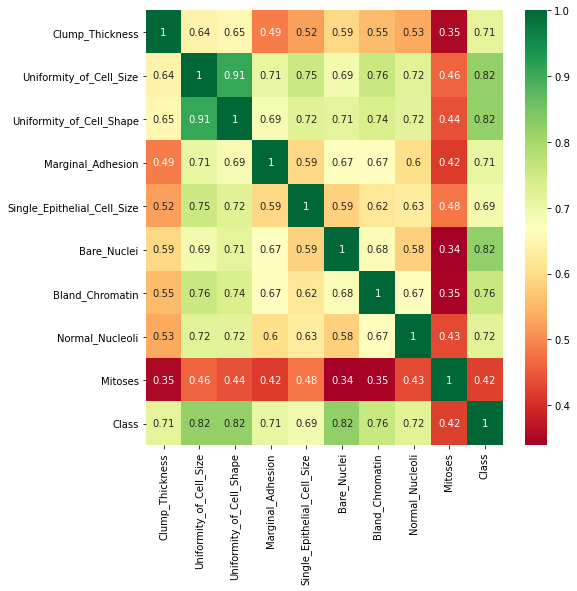

In [6]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize =(8,8))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap = 'RdYlGn')

### Highly co-related features - Uniformity_of_Cell_Size and Uniformity_of_Cell_Shape with 0.91

### Hence, drop  feaure

In [7]:
data = data.drop(["Uniformity_of_Cell_Shape"], axis = 1)

#### (d) Up-sampling of data (to account of unbalanced data)

In [8]:
data.Class.value_counts()

2    444
4    239
Name: Class, dtype: int64

In [9]:
df_majority = data[data.Class == 2]
df_minority = data[data.Class == 4]

df_minority_upsampled = resample(df_minority , replace = True, n_samples = 444, random_state =123)

df = pd.concat([df_majority, df_minority_upsampled])

df.Class.value_counts()

2    444
4    444
Name: Class, dtype: int64

#### (e) Seperate into Features and Labels

In [10]:
features = df.drop(["Class"], axis = 1)
labels = df["Class"]

#### (f) Given: Class - 2 for benign, 4 for malignant

#### Hence replace benign by 0 and malignant by 1.

In [11]:
labels = labels.replace(to_replace = [2, 4], value = [0, 1])

#### (g) Split data into test and train

In [12]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, 
                                                                            test_size=0.25, random_state = 42)

## 3. ML algorithms comparison

#### (a) Pipeline and evaluation

In [33]:
classifiers = [('KNN', KNeighborsClassifier()),
              ('Logistic Regression', LogisticRegression()),
               ('SVM', SVC()), 
               ('Decision Tree', DecisionTreeClassifier()), 
              ('Random Forest', RandomForestClassifier())]
acc = []
curve = []
for a,b in classifiers:
    pipe = Pipeline([(a, b)])
    
    model = pipe.fit(features_train, labels_train)
    pred = model.predict(features_test)
    
    accuracy = accuracy_score(labels_test, pred)
    print("Accuracy with {0}: {1:.2f}".format(a, accuracy))
    acc.append((a, accuracy))
    
    precision = precision_score(labels_test, pred)
    print ('Precision with {}: {:.2f}'.format(a, precision))

    recall = recall_score(labels_test, pred)
    print ('Recall with {}: {:.2f}'.format(a, recall))

    f1 = f1_score(labels_test, pred)
    print ('F1 score with {}: {:.2f}\n'.format(a, f1))
    
    auroc = roc_auc_score(labels_test, pred)
    fpr, tpr, thresholds = roc_curve(labels_test, pred)
    curve.append((a,fpr,tpr, auroc))

Accuracy with KNN: 0.98
Precision with KNN: 0.99
Recall with KNN: 0.96
F1 score with KNN: 0.98

Accuracy with Logistic Regression: 0.98
Precision with Logistic Regression: 0.98
Recall with Logistic Regression: 0.97
F1 score with Logistic Regression: 0.98

Accuracy with SVM: 0.97
Precision with SVM: 0.97
Recall with SVM: 0.97
F1 score with SVM: 0.97

Accuracy with Decision Tree: 0.98
Precision with Decision Tree: 1.00
Recall with Decision Tree: 0.95
F1 score with Decision Tree: 0.98

Accuracy with Random Forest: 0.99
Precision with Random Forest: 0.99
Recall with Random Forest: 0.99
F1 score with Random Forest: 0.99



#### Evaluation with ROC curve

AUROC score with KNN: 0.98
AUROC score with Logistic Regression: 0.98
AUROC score with SVM: 0.97
AUROC score with Decision Tree: 0.98
AUROC score with Random Forest: 0.99


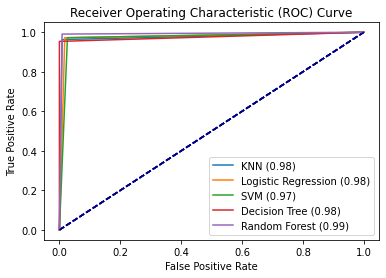

In [34]:
for a,fpr,tpr,auroc in curve:
    plt.plot(fpr, tpr, label= a + " (" + str(round(auroc, 2)) + ")" )
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    print("AUROC score with {}: {:.2f}".format(a,auroc))

#### (b) Cross-validation with Model selection and Box-plot

KNN: 0.98 (0.02)
Logistic Regression: 0.97 (0.03)
SVM: 0.97 (0.03)
Decision Tree: 0.96 (0.02)
Random Forest: 0.98 (0.02)


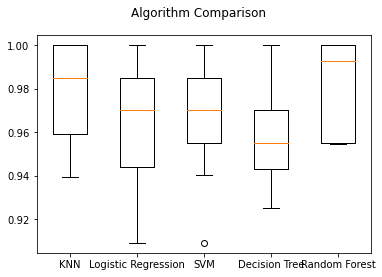

In [15]:
results = []
names = []

for a,b in classifiers:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=7)
    cv_results = model_selection.cross_val_score(b, features_train, labels_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(a)
    print("{}: {:.2f} ({:.2f})".format(a, cv_results.mean(), cv_results.std()))
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### GridSearch -  Individual evaluation with Feature Importances

#### KNN

Best Score with KNN: 0.98


<AxesSubplot:>

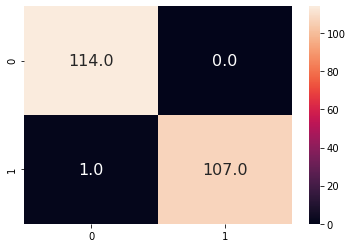

In [17]:
grid_params = {'n_neighbors': [3,5,7,9], 'weights' : ['uniform', 'distance'], 'metric' : ['euclidian', 'manhattan']}

gs=  GridSearchCV(KNeighborsClassifier(), grid_params, cv = 3, n_jobs = -1)
gs_results = gs.fit(features_train, labels_train)
print("Best Score with KNN: {:.2f}".format(gs_results.best_score_))

#confusion matrix
pred = gs.predict(features_test)
c = confusion_matrix(labels_test.values.reshape(-1,1), pred)
sns.heatmap(c, annot=True, annot_kws={"size": 16},  fmt=".1f")

#### Logistic Regression

Best Score with Logistic Regression: 0.96


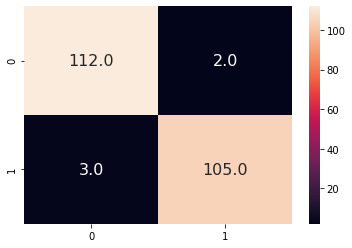

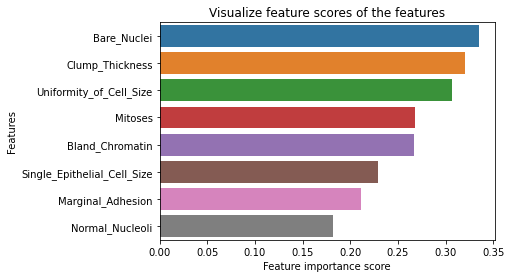

In [18]:
params = {'fit_intercept': [True,False],
          'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

gs =  GridSearchCV(LogisticRegression(), params, n_jobs = -1,cv=5)
gs.fit(features_train, labels_train)
print("Best Score with Logistic Regression: {:.2f}".format(gs.best_score_))

#confusion matrix
pred = gs.predict(features_test)
c = confusion_matrix(labels_test.values.reshape(-1,1), pred)
sns.heatmap(c, annot=True, annot_kws={"size": 16},  fmt=".1f")

#feature importance
feature_scores = pd.Series(gs.best_estimator_.coef_[0], 
                           index=list(features.columns)).sort_values(ascending=False)

f, ax = plt.subplots()
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

#### SVM

Best Score with SVM: 0.97


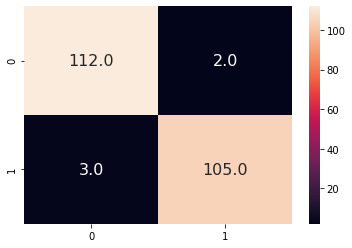

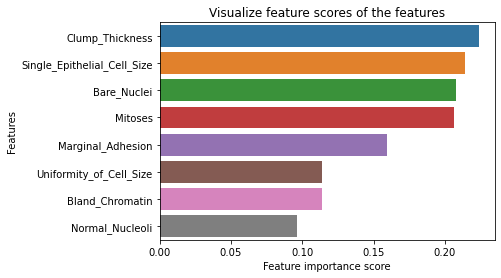

In [19]:
params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 

gs =  GridSearchCV(SVC(), params, n_jobs = -1,cv=5)
gs.fit(features_train, labels_train)
print("Best Score with SVM: {:.2f}".format(gs.best_score_))

#confusion matrix
pred = gs.predict(features_test)
c = confusion_matrix(labels_test.values.reshape(-1,1), pred)
sns.heatmap(c, annot=True, annot_kws={"size": 16},  fmt=".1f")


#feature importance
feature_scores = pd.Series(gs.best_estimator_.coef_[0], 
                           index=list(features.columns)).sort_values(ascending=False)

f, ax = plt.subplots()
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

#### Decision Tree

Best Score with Decision Tree: 0.97


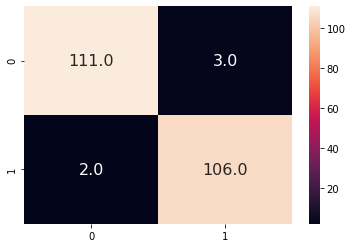

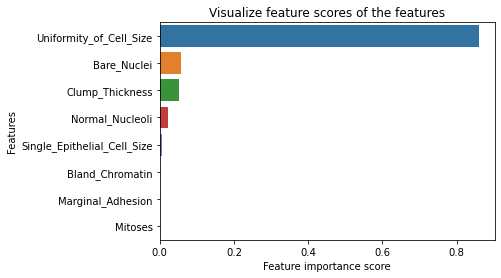

In [20]:
params = {'criterion':['gini', 'entropy', 'variance'],
          'min_samples_split':[2, 25, 50]}

gs =  GridSearchCV(DecisionTreeClassifier(), params, n_jobs = -1,cv=5)
gs.fit(features_train, labels_train)
print("Best Score with Decision Tree: {:.2f}".format(gs.best_score_))

#confusion matrix
pred = gs.predict(features_test)
c = confusion_matrix(labels_test.values.reshape(-1,1), pred)
sns.heatmap(c, annot=True, annot_kws={"size": 16},  fmt=".1f")

#feature importance
feature_scores = pd.Series(gs.best_estimator_.feature_importances_, 
                           index=list(features.columns)).sort_values(ascending=False)

f, ax = plt.subplots()
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

#### Random Forest

In [21]:
grid_params = {'bootstrap': [True, False],'criterion': ['gini', 'entropy'], 'n_estimators':[50,200,250],
               'max_depth':[10,50,100,120], 'max_features': ['auto', 'sqrt'],
               'min_samples_leaf':[3,4],'min_samples_split':[2,5,10]}

gs_rf =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 3, n_jobs = -1)
res = gs_rf.fit(features_train, labels_train)

In [22]:
print("Best parameters with Random Forest:", res.best_params_)
print("\nBest Score with Random Forest: {:.2f}".format(res.best_score_))

Best parameters with Random Forest: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 50}

Best Score with Random Forest: 0.98


<AxesSubplot:>

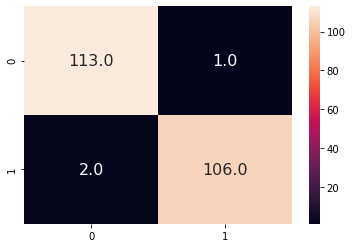

In [24]:
pred = res.predict(features_test)
c = confusion_matrix(labels_test.values.reshape(-1,1), pred)
sns.heatmap(c, annot=True, annot_kws={"size": 16},  fmt=".1f")

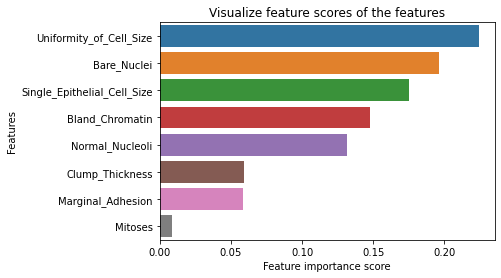

In [25]:
feature_scores = pd.Series(res.best_estimator_.feature_importances_, 
                           index=list(features.columns)).sort_values(ascending=False)

f, ax = plt.subplots()
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### Ranking of ML algorithms

#### From the above evaluation metrics, the ranking of algorithms is as follows:
#### 1. Random Forest
#### 2. KNN and Decision Trees
#### 3. SVM
#### 4. Logistic Regression


### Conclusion

#### According to my methods above,
#### - Random Forest works best for WBCD 
#### -  Bare Nuclei  and Uniformity of cell size were seen to be consistent features of importance

### Literature


#### In the below paper, they have used Bare Nuclei and Uniformity of cell size as one of their important features: 

https://www.karger.com/Article/FullText/508780

##### "The presence of bare atypical nuclei in the background emerged as a potential significant diagnostic and predictive feature in FNA smears of breast carcinoma. A multivariant study by Ozkutlu et al. on selecting key cytologic criteria to separate proliferative breast disease from carcinoma showed that the presence of bare atypical nuclei aided significantly in the diagnosis of carcinoma"

Fan F, Namiq AL, Tawfik OW, Thomas PA. Proposed prognostic score for breast carcinoma on fine needle aspiration based on nuclear grade, cellular dyscohesion and bare atypical nuclei. Diagn Cytopathol. 2006 Aug;34(8):542-6. doi: 10.1002/dc.20529 PMID: 16850493.

##### "Nuclear morphometry was thus, a useful objective tool in the differentiating benign, and malignant breast lesions"

Narasimha, A., Vasavi, B., & Kumar, H. M. (2013). Significance of nuclear morphometry in benign and malignant breast aspirates. International journal of applied & basic medical research, 3(1), 22–26. https://doi.org/10.4103/2229-516X.112237

##### "The model was used to quantify the impact of tumor size, histologic grade, and lymph node involvement on the probability of distant spread."

Maurice Tubiana, Serge Koscielny (1999) The Rationale for Early
Diagnosis of Cancer: The Example of Breast Cancer, Acta Oncologica, 38:3, 295-303, DOI:
10.1080/028418699431357